# **SALES DATA ANALYSIS**
# Team 3
### PH 12 Rutumbara Chakor
### PH 29 Shruti Agrawal
### PH 31 Sejal Kadam
### PH 33 Vedant Karle
### PH 39 Shreeraj Patil

Dataset Link:
https://www.kaggle.com/knightbearr/sales-product-data?select=Sales_December_2019.csv

In [1]:
import pandas as pd
from zipfile import ZipFile
import os
import seaborn as sns

In [2]:
with ZipFile('Sales_Data.zip', 'r') as zip:
  zip.extractall()
  print('Done')


Done


In [3]:
# Task 1 : Merge 12 months sales data into a single CSV file

files = [file for file in os.listdir("Sales_Data")]

all_months_data = pd.DataFrame();

for file in files:
  df = df = pd.read_csv('Sales_Data/'+file)
  all_months_data = pd.concat([all_months_data,df])

all_months_data.to_csv("all_data.csv",index=False)


In [4]:
sales_data = pd.read_csv("all_data.csv")

sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


In [5]:
sales_data = sales_data[sales_data['Order Date'].str[0:2]!='Or']

In [6]:
# Task 2 : Add a month column,cleanup the null data,convert data types 

sales_data = sales_data.dropna(how="all")

sales_data['Month'] = sales_data["Order Date"].str[0:2]

sales_data['Month'] = pd.to_numeric(sales_data['Month'])

sales_data["Quantity Ordered"] = pd.to_numeric(sales_data["Quantity Ordered"]).astype("int32")

sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [7]:
#Task 3 : Add a sales column

sales_data["Sales"] = sales_data["Quantity Ordered"] * sales_data["Price Each"]
sales_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99


In [8]:
#Task 4 : Add a city column

def get_city(address):
  return address.split(',')[1]

def get_state(address):
  return address.split(',')[2].split(" ")[1]

sales_data['City'] = sales_data['Purchase Address'].apply(lambda x:get_city(x) + " (" + get_state(x) + ")")

sales_data.head()

sales_data.to_csv("final.csv",index=False)


## ***What was the best month for sales? How much was earned in that month?***

In [9]:
results = sales_data.groupby('Month').sum()

results.head(12)

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


Text(0.5, 0, 'Month Number')

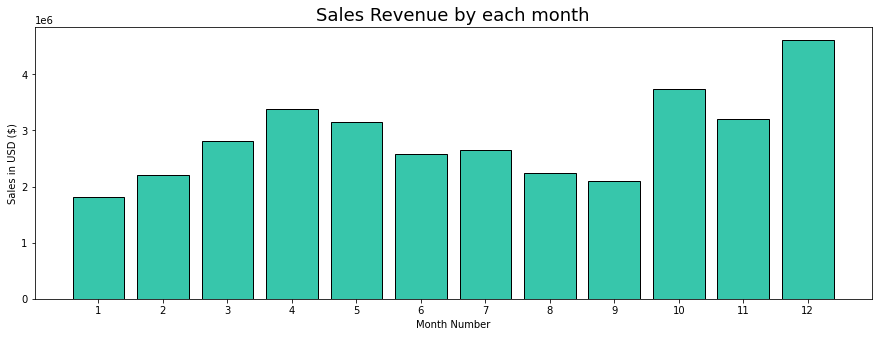

In [10]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.figure(figsize = (15,5))
plt.title('Sales Revenue by each month', fontsize = 18)
plt.bar(months,results['Sales'],color = '#37C6AB', edgecolor = 'black', linewidth = 1)
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')


## ***Which city had the highest number of sales?***

In [11]:
results = sales_data.groupby('City').sum()
results.head(20)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


Text(0.5, 0, 'City Name')

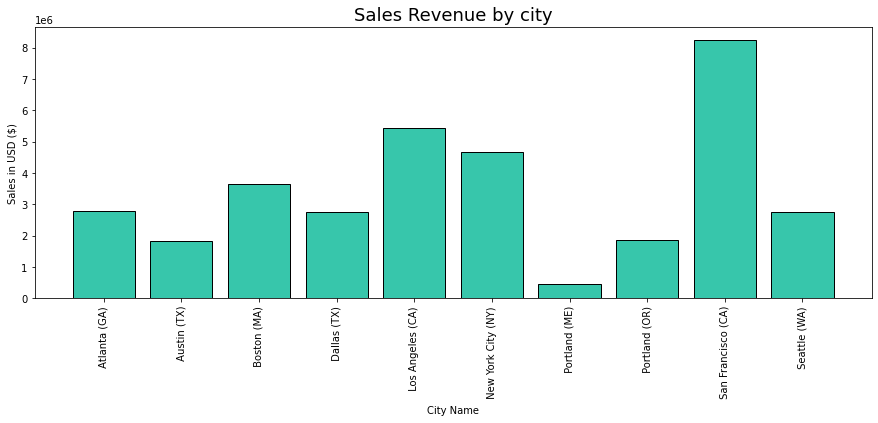

In [12]:
cities = [city for city,df in sales_data.groupby('City')]
plt.figure(figsize = (15,5))
plt.title('Sales Revenue by city', fontsize = 18)
plt.bar(cities,results['Sales'],color = '#37C6AB', edgecolor = 'black', linewidth = 1)
plt.xticks(cities,rotation="vertical")
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')

## ***What time we should display advertisement to maximize likelihood of customer's buying product?***

Text(0.5, 0, 'Hour')

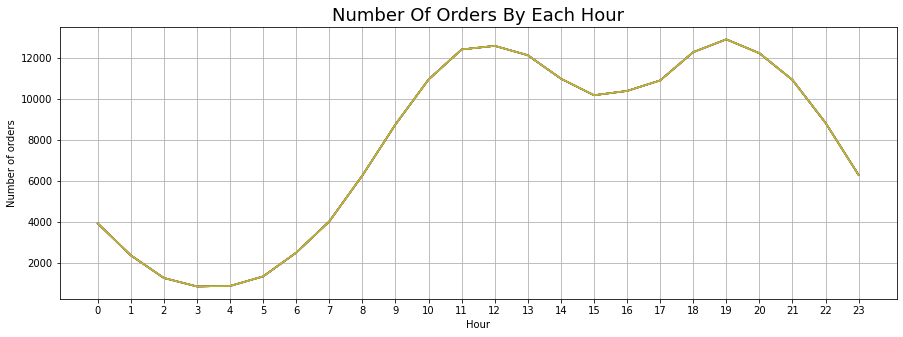

In [13]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

sales_data['Hour'] = sales_data['Order Date'].dt.hour

hours = [hour for hour,df in sales_data.groupby('Hour')]

plt.figure(figsize = (15,5))
plt.title('Number Of Orders By Each Hour', fontsize = 18)
plt.plot(hours,sales_data.groupby('Hour').count())
plt.grid()
plt.xticks(hours)
plt.ylabel('Number of orders')
plt.xlabel('Hour')


## ***What products are most often sold together?***

In [14]:
df = sales_data[sales_data["Order ID"].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

df = df[['Order ID','Grouped']].drop_duplicates()

df.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Grouped
62,259420,"Google Phone,USB-C Charging Cable"
65,259422,"Google Phone,USB-C Charging Cable"
82,259438,"iPhone,Lightning Charging Cable"
103,259458,"34in Ultrawide Monitor,ThinkPad Laptop"
123,259477,"LG Dryer,AAA Batteries (4-pack)"
176,259529,"iPhone,Apple Airpods Headphones,Wired Headphones"
186,259537,"AAA Batteries (4-pack),USB-C Charging Cable"
204,259554,"Apple Airpods Headphones,USB-C Charging Cable"
235,259584,"iPhone,Lightning Charging Cable"
259,259607,"iPhone,Lightning Charging Cable"


In [15]:
from itertools import combinations
from collections import Counter

count = Counter() 

data_pair = {
    'Product Pair':[],
    "Quantity Ordered":[],
}

for row in df['Grouped']:
  row_list = row.split(",")
  count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
  data_pair['Product Pair'].append(key)
  data_pair['Quantity Ordered'].append(value)


data_pair = pd.DataFrame(data_pair)

data_pair.head(20)


,Product Pair,Quantity Ordered
0,"(iPhone, Lightning Charging Cable)",1005
1,"(Google Phone, USB-C Charging Cable)",987
2,"(iPhone, Wired Headphones)",447
3,"(Google Phone, Wired Headphones)",414
4,"(Vareebadd Phone, USB-C Charging Cable)",361
5,"(iPhone, Apple Airpods Headphones)",360
6,"(Google Phone, Bose SoundSport Headphones)",220
7,"(USB-C Charging Cable, Wired Headphones)",160
8,"(Vareebadd Phone, Wired Headphones)",143
9,"(Lightning Charging Cable, Wired Headphones)",92


## ***What Product Sold The Most? Why do you think so?***

Text(0.5, 0, 'Products')

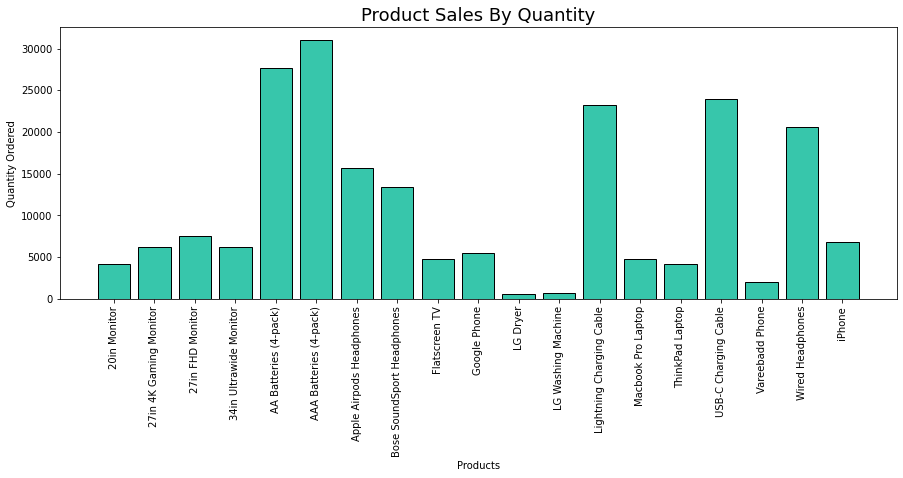

In [16]:
product_group = sales_data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product,df in product_group]
plt.figure(figsize = (15,5))
plt.title('Product Sales By Quantity', fontsize = 18)
plt.bar(products,quantity_ordered,color = '#37C6AB', edgecolor = 'black', linewidth = 1)
plt.xticks(products,rotation="vertical")
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')


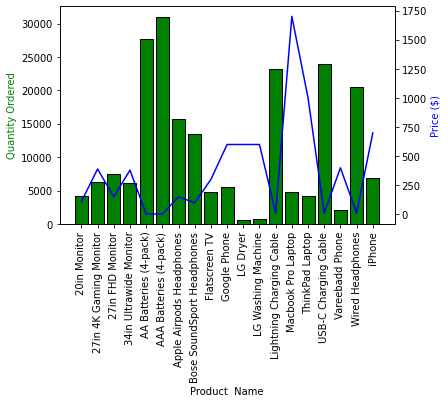

In [17]:
#Lets try to build a corelation between product and prices

prices = sales_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered,color = 'g', edgecolor = 'black', linewidth = 1)
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product  Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products,rotation="vertical")

plt.show()


In [18]:
from sklearn import linear_model

product_group = sales_data.groupby('Product').sum()

reg = linear_model.LinearRegression()


prices = sales_data.groupby('Product').mean()

product_group.head(20)

reg.fit(prices[['Price Each']],product_group['Quantity Ordered'])


LinearRegression()

In [35]:
reg.predict([[500]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([9383.97857081])

## ***Which Product Sold More Where ?***

In [20]:
unique_pro = list(sales_data['Product'].unique())
unique_city = list(sales_data['City'].unique())

temp = sales_data.loc[sales_data['Product']=='34in Ultrawide Monitor']
temp2 = temp.loc[temp['City']==' Dallas (TX)']

total_rows = temp2['Product'].count()

In [21]:
data = {
    'Product':[],
    "City":[],
    "Count":[]
}

for i in unique_pro:
  for j in unique_city:
    temp = sales_data.loc[sales_data['Product']==i]
    temp2 = temp.loc[temp['City']==j]
    total_rows = temp2['Product'].count()+1
    data['Product'].append(i)
    data['City'].append(j)
    data['Count'].append(total_rows)

data = pd.DataFrame(data)

data.head(20)

,Product,City,Count
0,34in Ultrawide Monitor,Dallas (TX),512
1,34in Ultrawide Monitor,Los Angeles (CA),954
2,34in Ultrawide Monitor,New York City (NY),866
3,34in Ultrawide Monitor,San Francisco (CA),1443
4,34in Ultrawide Monitor,Boston (MA),670
5,34in Ultrawide Monitor,Portland (OR),327
6,34in Ultrawide Monitor,Atlanta (GA),479
7,34in Ultrawide Monitor,Austin (TX),329
8,34in Ultrawide Monitor,Seattle (WA),534
9,34in Ultrawide Monitor,Portland (ME),77


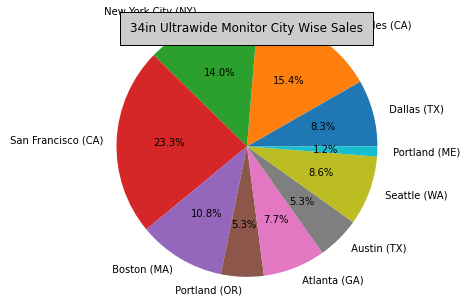

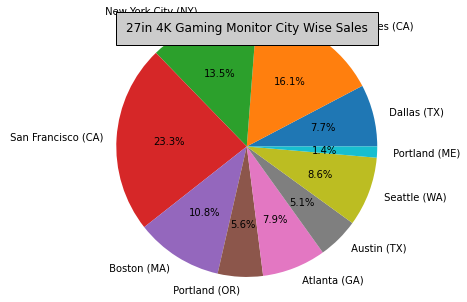

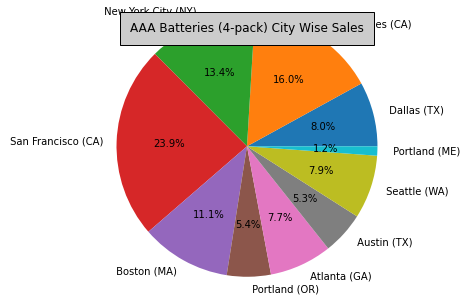

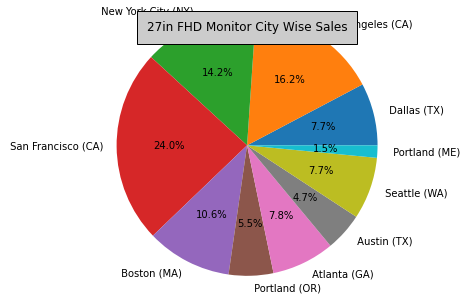

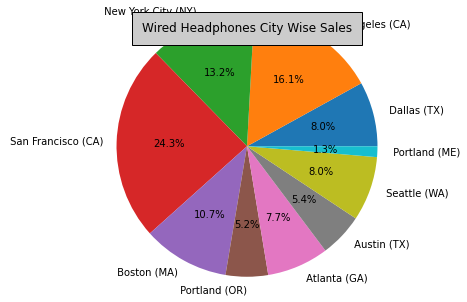

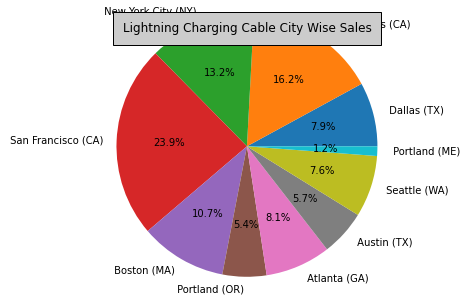

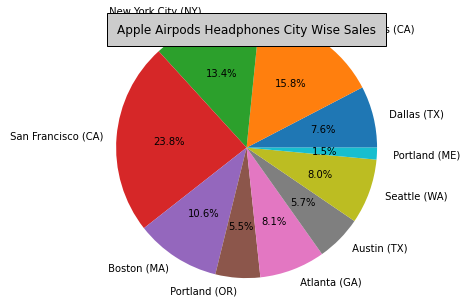

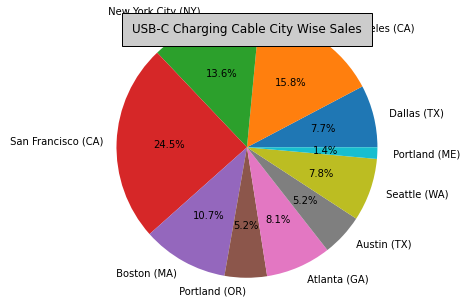

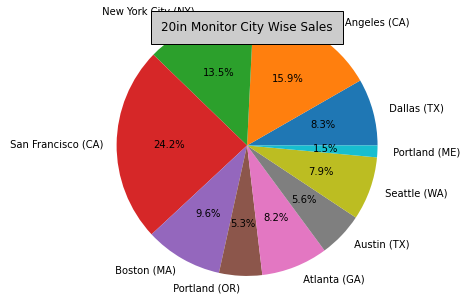

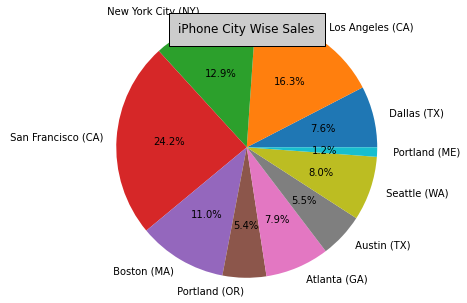

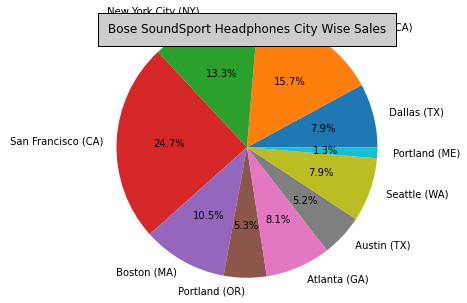

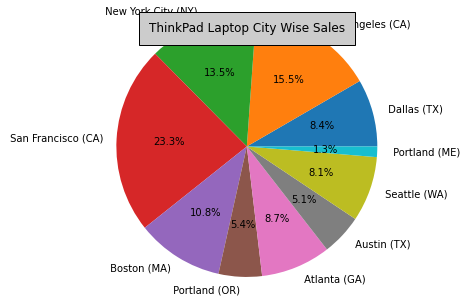

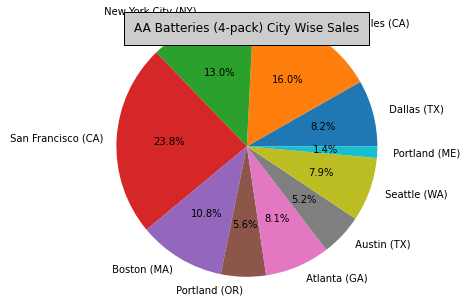

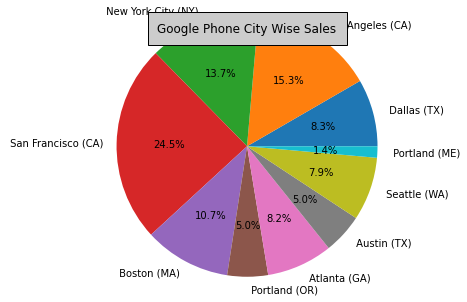

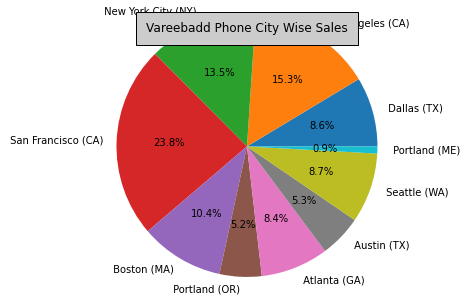

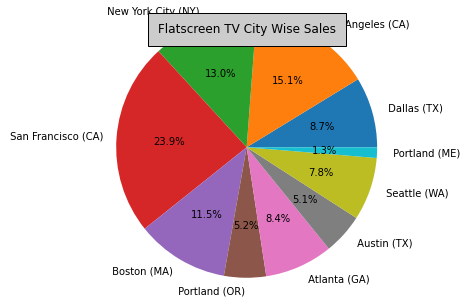

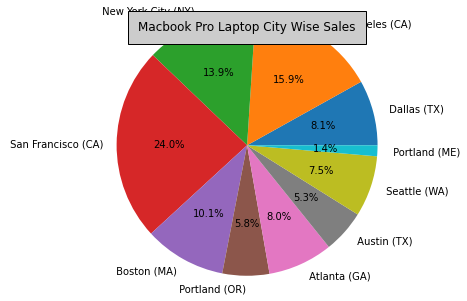

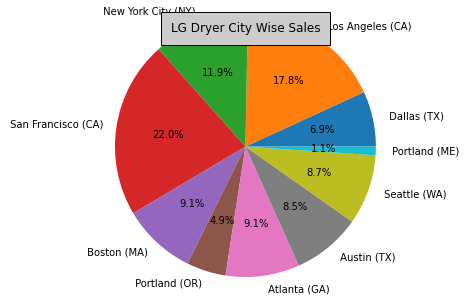

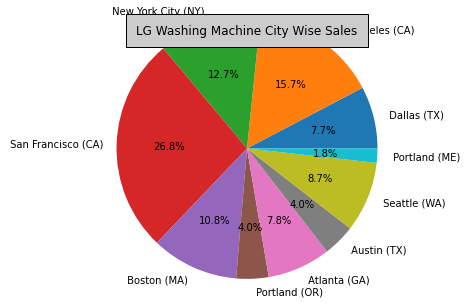

In [22]:
for i in unique_pro:
  plt.pie(data.loc[data['Product']==i]['Count'],labels=data.head(10)['City'],autopct='%2.1f%%',radius=1.5)
  plt.title(i + " City Wise Sales", bbox={'facecolor':'0.8', 'pad':10})
  plt.show()

## ***Sales Prediction***

In [37]:
old_sales_data = pd.read_csv("2017_sales_data.csv")

old_sales_data['Order Date'] = pd.to_datetime(old_sales_data['Order Date'])

old_sales_data['Month'] = old_sales_data['Order Date'].dt.month

old_sales_data.head()

,Order Date,Sales,Month
0,2017-04-15,15.55,4
1,2017-07-16,71.37,7
2,2017-10-19,29.47,10
3,2017-09-10,147.17,9
4,2017-09-19,95.62,9


In [38]:
pd.set_option('display.float_format', '{:.2f}'.format)

data2 = {
    "Month":[1,2,3,4,5,6,7,8,9,10,11,12],
    "Sales":[]
}

results = old_sales_data.groupby('Month').sum()

for i in results['Sales']:
  data2['Sales'].append(i)


data2 = pd.DataFrame(data2)

data2["Sales_LastMonth"] = data2["Sales"].shift(+1)
data2["Sales_2MonthsBack"] = data2["Sales"].shift(+2)
data2["Sales_3MonthsBack"] = data2["Sales"].shift(+3)

data2 = data2.dropna()

data2.head(20)


,Month,Sales,Sales_LastMonth,Sales_2MonthsBack,Sales_3MonthsBack
3,4,36521.54,58872.35,20301.13,43971.37
4,5,44261.11,36521.54,58872.35,20301.13
5,6,52981.73,44261.11,36521.54,58872.35
6,7,45264.42,52981.73,44261.11,36521.54
7,8,63120.89,45264.42,52981.73,44261.11
8,9,87866.65,63120.89,45264.42,52981.73
9,10,77776.92,87866.65,63120.89,45264.42
10,11,118447.82,77776.92,87866.65,63120.89
11,12,83829.32,118447.82,77776.92,87866.65


In [39]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=500)

In [40]:
import numpy as np

x1,x2,x3,y=data2["Sales_LastMonth"],data2['Sales_2MonthsBack'],data2['Sales_3MonthsBack'],data2['Sales']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[ 58872.3528  20301.1334  43971.374 ]
 [ 36521.5361  58872.3528  20301.1334]
 [ 44261.1102  36521.5361  58872.3528]
 [ 52981.7257  44261.1102  36521.5361]
 [ 45264.416   52981.7257  44261.1102]
 [ 63120.888   45264.416   52981.7257]
 [ 87866.652   63120.888   45264.416 ]
 [ 77776.9232  87866.652   63120.888 ]
 [118447.825   77776.9232  87866.652 ]]


In [41]:
X_train,X_test,y_train,y_test=final_x[:-3],final_x[-7:],y[:-3],y[-7:]

In [42]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


LinearRegression()

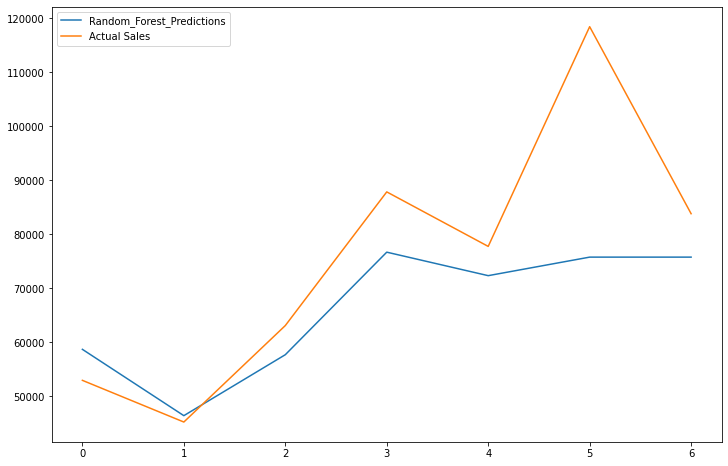

In [43]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

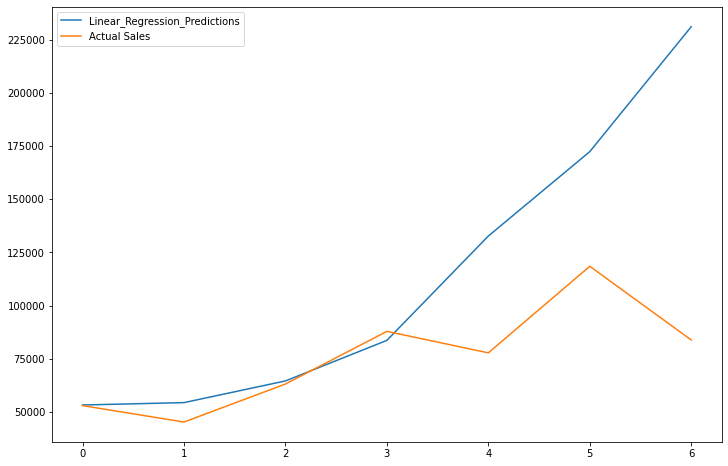

In [44]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [45]:
data3 = {
    "Month":[1,2,3,4,5,6,7,8,9,10,11,12],
    "Sales":[]
}

results2 = sales_data.groupby('Month').sum()


for i in results2['Sales']:
  data3['Sales'].append(i)


data3 = pd.DataFrame(data3)

data3["Sales_LastMonth"] = data3["Sales"].shift(+1)
data3["Sales_2MonthsBack"] = data3["Sales"].shift(+2)
data3["Sales_3MonthsBack"] = data3["Sales"].shift(+3)

data3 = data3.dropna()

data3.head(20)

,Month,Sales,Sales_LastMonth,Sales_2MonthsBack,Sales_3MonthsBack
3,4,3390670.24,2807100.38,2202022.42,1822256.73
4,5,3152606.75,3390670.24,2807100.38,2202022.42
5,6,2577802.26,3152606.75,3390670.24,2807100.38
6,7,2647775.76,2577802.26,3152606.75,3390670.24
7,8,2244467.88,2647775.76,2577802.26,3152606.75
8,9,2097560.13,2244467.88,2647775.76,2577802.26
9,10,3736726.88,2097560.13,2244467.88,2647775.76
10,11,3199603.20,3736726.88,2097560.13,2244467.88
11,12,4613443.34,3199603.20,3736726.88,2097560.13


In [46]:
x1,x2,x3,y=data3["Sales_LastMonth"],data3['Sales_2MonthsBack'],data3['Sales_3MonthsBack'],data3['Sales']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

X_train,X_test,y_train,y_test=final_x[:-3],final_x[-7:],y[:-3],y[-7:]

model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

[[2807100.38 2202022.42 1822256.73]
 [3390670.24 2807100.38 2202022.42]
 [3152606.75 3390670.24 2807100.38]
 [2577802.26 3152606.75 3390670.24]
 [2647775.76 2577802.26 3152606.75]
 [2244467.88 2647775.76 2577802.26]
 [2097560.13 2244467.88 2647775.76]
 [3736726.88 2097560.13 2244467.88]
 [3199603.2  3736726.88 2097560.13]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


LinearRegression()

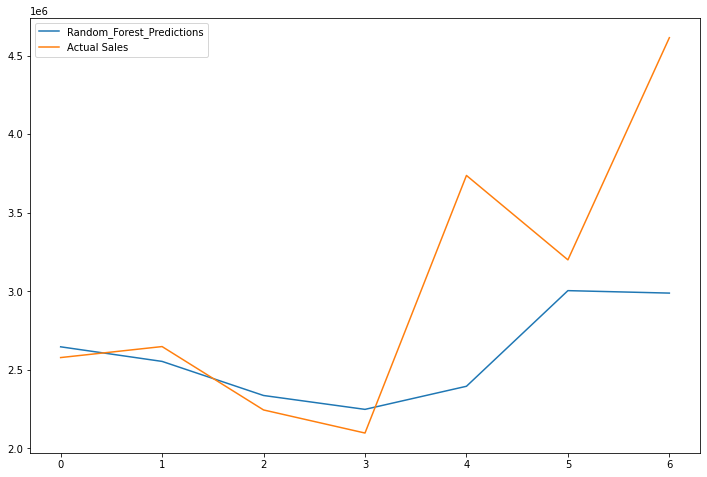

In [47]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

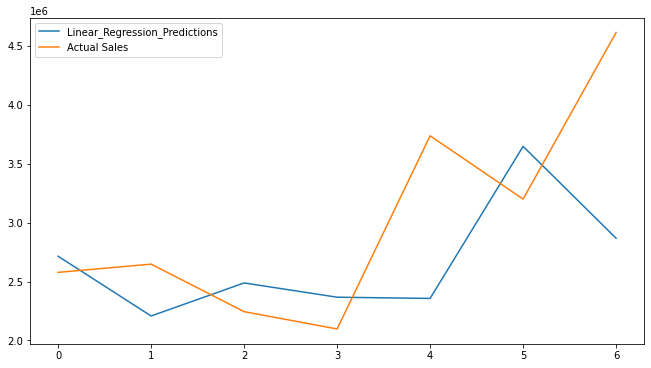

In [48]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()